<a href="https://colab.research.google.com/github/AnilSharma09/CODSOFT/blob/main/Task_3_IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal

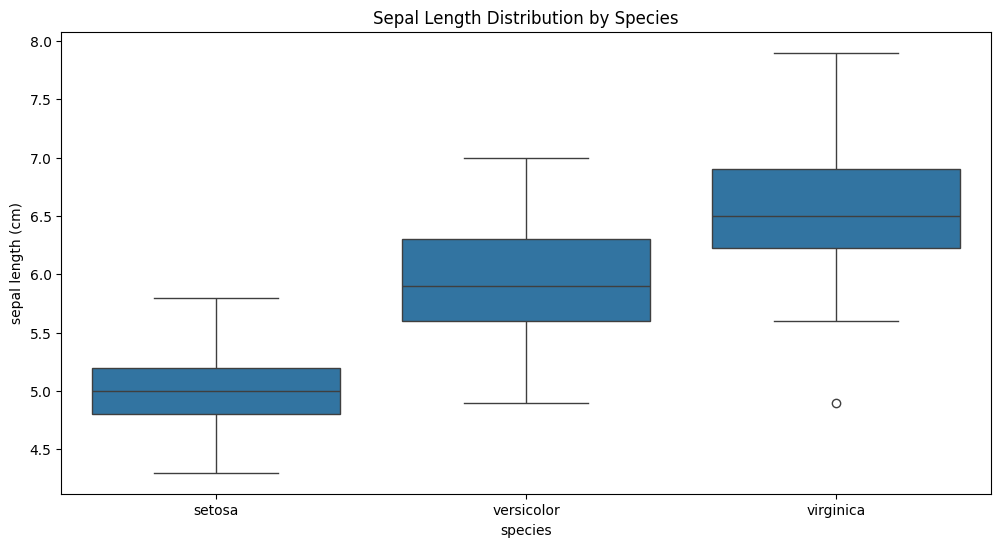


=== K-Nearest Neighbors ===
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



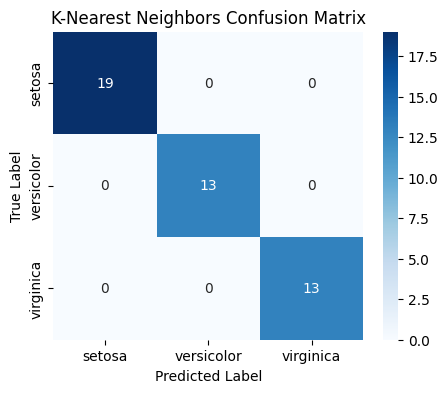


=== Support Vector Machine ===
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



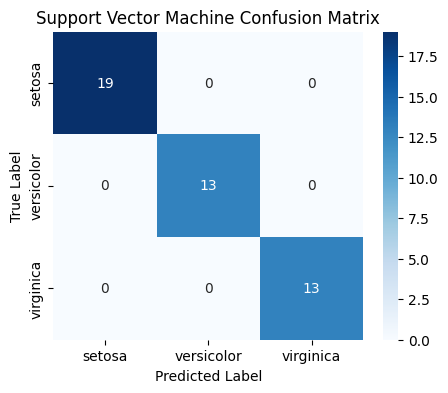


=== Random Forest ===
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



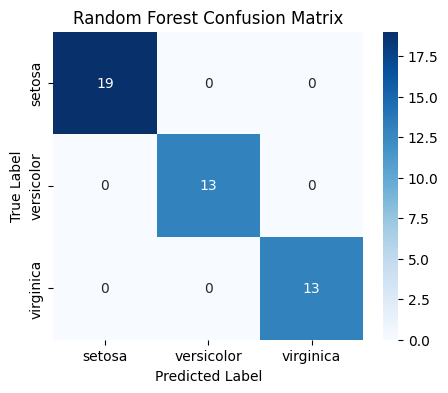

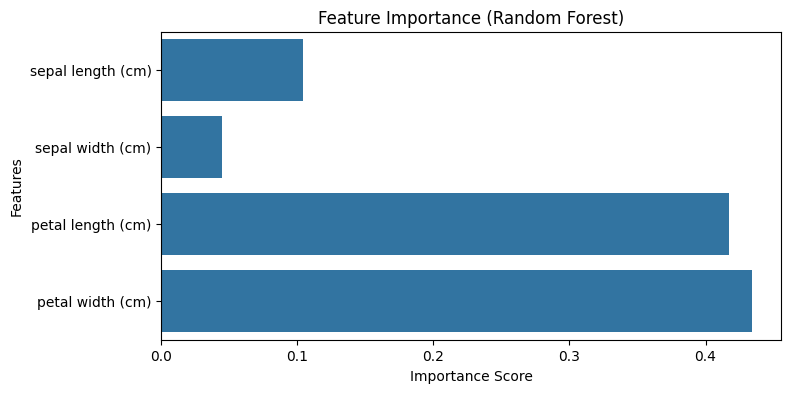


=== Sample Predictions ===

Sample 1:
Features: {'sepal length (cm)': np.float64(0.3100622994335013), 'sepal width (cm)': np.float64(-0.022843794791952487), 'petal length (cm)': np.float64(0.6009578125710627), 'petal width (cm)': np.float64(0.7588895643458698)}
True Species: virginica
Predicted Species: virginica
✅ Correct

Sample 2:
Features: {'sepal length (cm)': np.float64(-0.1722568330186079), 'sepal width (cm)': np.float64(3.335194039624919), 'petal length (cm)': np.float64(-1.3837039736256942), 'petal width (cm)': np.float64(-1.1351132532915298)}
True Species: setosa
Predicted Species: setosa
✅ Correct

Sample 3:
Features: {'sepal length (cm)': np.float64(-0.1722568330186079), 'sepal width (cm)': np.float64(-0.5025634854229344), 'petal length (cm)': np.float64(0.36746819066556174), 'petal width (cm)': np.float64(0.08245998661822711)}
True Species: versicolor
Predicted Species: versicolor
✅ Correct

Sample 4:
Features: {'sepal length (cm)': np.float64(0.43064208254652936), 'sepal

In [ ]:
# -*- coding: utf-8 -*-
"""
Iris Flower Classification - Fixed Version
"""

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the dataset properly
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Exploratory Data Analysis (EDA)
print("\nDataset Information:")
print(df.info())

print("\nClass Distribution:")
print(df['species'].value_counts())

# Visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species', y='sepal length (cm)')
plt.title('Sepal Length Distribution by Species')
plt.show()

# Step 4: Data Preprocessing
X = iris.data  # Using numpy array directly for features
y = iris.target  # Using numpy array directly for target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Model Training and Evaluation
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Step 6: Feature Importance (for Random Forest)
rf = models["Random Forest"]
importances = rf.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Step 7: Sample Predictions
print("\n=== Sample Predictions ===")
sample_indices = np.random.choice(len(X_test), 5, replace=False)
for i, idx in enumerate(sample_indices, 1):
    sample = X_test[idx].reshape(1, -1)
    true_label = y_test[idx]
    pred_label = rf.predict(sample)[0]

    print(f"\nSample {i}:")
    print("Features:", dict(zip(features, sample[0])))
    print(f"True Species: {iris.target_names[true_label]}")
    print(f"Predicted Species: {iris.target_names[pred_label]}")
    print("✅ Correct" if true_label == pred_label else "❌ Incorrect")